# Extracted Graph data plotting and add biases

In [2]:
## install Dependencies
!pip install pandas numpy matplotlib

In [3]:
## importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
## file loading
dir= os.getcwd()
file= 'graph_test.csv'
graph_df= pd.read_csv(os.path.join(dir, file))
graph_df

,Time,Temperature
0,1.03190,-8.770300
1,2.01387,-5.197220
2,3.01248,-0.730858
3,3.97781,3.097450
4,4.94313,9.477960
5,5.92510,14.837600
6,6.94036,20.069600
7,7.93897,21.600900
8,8.90430,16.113700
9,9.88627,8.329470


In [10]:
## 'date' feature modification into integer form
graph_df['date']= pd.Series(list(range(1, len(graph_df)+1)), name= 'date')
graph_df.head()

,Time,Temperature,date
0,1.03190,-8.770300,1
1,2.01387,-5.197220,2
2,3.01248,-0.730858,3
3,3.97781,3.097450,4
4,4.94313,9.477960,5


In [11]:
## Plotting graph
def visualize_graph(graph_df, title):
    plt.plot(graph_df.date, graph_df.Temperature, label='graph', color='green')
    plt.plot(graph_df.date, graph_df.Temperature, 'go')
    plt.ylim(-20, 35)
    plt.grid()
    plt.legend()

    plt.title(title)
    for i in range(len(graph_df)):
        height= graph_df.Temperature[i]
        plt.text(graph_df.date[i], height + 0.5, '%.1f' %height, ha='center', va='bottom', size = 12)
    plt.show()

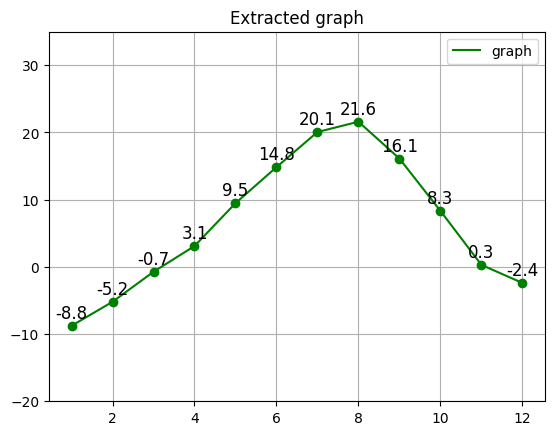

In [12]:
title= 'Extracted graph'
visualize_graph(graph_df, title)

## Add biases into extracted graph data

In [13]:
## In order to add biases, change form of dataframe into array
graph_array= graph_df.loc[:, ['Temperature']].values
graph_array

array([[-8.7703  ],
       [-5.19722 ],
       [-0.730858],
       [ 3.09745 ],
       [ 9.47796 ],
       [14.8376  ],
       [20.0696  ],
       [21.6009  ],
       [16.1137  ],
       [ 8.32947 ],
       [ 0.290023],
       [-2.38979 ]])

In [14]:
## generate biases
freq1, freq2, offsets1, offsets2 = np.random.rand(4, 1, 1)
time= np.linspace(0, 1, len(graph_df))

graph_array += 0.1*np.sin((time- offsets1)*(freq1*+10)).reshape(graph_array.shape) # sine curve(biases)
graph_array += 0.8*(np.random.rand(len(graph_df), 1) - 0.5) # biases
graph_array 

array([[-8.48129279],
       [-4.87282782],
       [-0.69232432],
       [ 3.01176352],
       [ 9.6585108 ],
       [14.43835063],
       [20.29380373],
       [21.57902238],
       [16.4249684 ],
       [ 8.39303205],
       [ 0.62471535],
       [-2.31075936]])

In [15]:
## To plot graph, change the array into dataframe
graph_df= pd.concat([pd.Series(list(range(1, len(graph_array)+1)), name='date'), \
    pd.DataFrame(np.squeeze(graph_array), columns=['Temperature'])], axis=1)

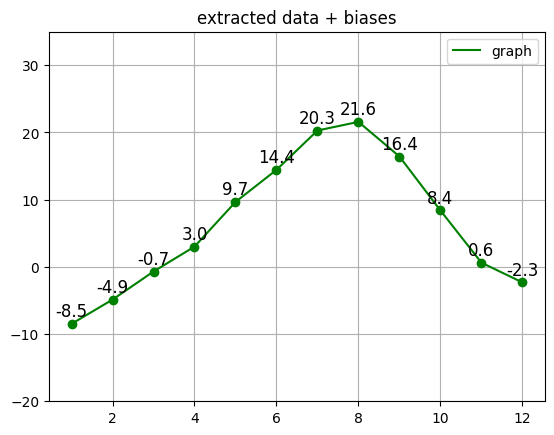

In [16]:
visualize_graph(graph_df, 'extracted data + biases')